## Session  5- Missing Value Imputation and Outlier Analysis

### Part 1 -  Missing Value imputation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Follow these:

data = {2,3,5,1,NA,5,NA}
<br/>
<br/>
1) Repalce the missing values by 0<br/><br/>
It makes the data to skew towards zero.<br/>
(16+0+0}/7 = 2.28 ->mean is skewed towards zero.<br/>
Not recommended.
<br/>
<br/>
2) Ignore the missing value:

mean=16/5 = 3.2
For more than one variable, this may lead us to a(massive) loss of information.<br/>
Deleting observations may also make the data bias-> Random samples no longer reamains random.<br/>
<br/>
3) Replace by mean/median:
mean = 3.2 (Ignore the missing values)<br/>
Replace all the missing values by mean.(if its skewed then its problem).<br/>
Skewed data--> symmertric data(through log transforamtion<br/>
after this we can impute the missing value by mean(log(data))<br/>
then transform log(data) back to data<br/>
<br/>

4) Replace by mode if varaible is categorical:<br/>
Mode: highest frequency<br/>
The probability of the variable is high change of occuring we take mode, and impute the missing value with mode.<br/>
If its bimodal or multimodal, use local mode instead of global mode.


In [2]:
%pwd

'C:\\Users\\Goutham-ROG\\Documents\\1-Codes\\Python - codes\\IML(Numpy)\\Class exercises'

In [3]:
#Loading the data
import os
os.chdir(r"C:\\Users\\Goutham-ROG\\Documents\\1-Codes\\Python - codes\\IML(Numpy)\\Class exercises")

fram = pd.read_csv("S5_framingham.csv")

In [4]:
fram.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
#description of the data
fram.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


By seeing the about data, the count is not macthing: 4135 for eduaction whereas for age:4240<br/>
This tells us that somevalues are missing

#### 1. The isnul() method

In [5]:
#returns df of true - if the datapoint is missing, else false
fram.isnull().head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
type(fram.isnull())

pandas.core.frame.DataFrame

In [8]:
#Getting the number of missing values
missing = fram.isnull().sum()
missing

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
type(missing) #since it is series we can plot

pandas.core.series.Series

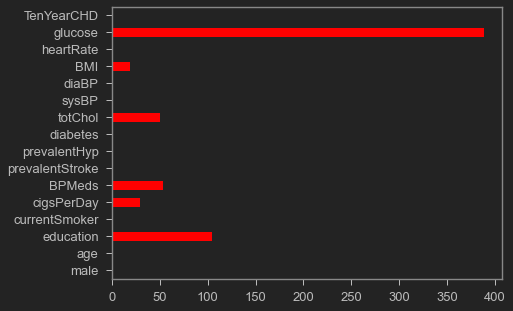

In [10]:
#Plotting the missing value information
missing.plot(kind='barh',figsize=(7,5), color='Red', fontsize=13)
plt.show()

In [11]:
#Getting the percentage of missing values
round(missing/len(fram)*100,3)

male               0.000
age                0.000
education          2.476
currentSmoker      0.000
cigsPerDay         0.684
BPMeds             1.250
prevalentStroke    0.000
prevalentHyp       0.000
diabetes           0.000
totChol            1.179
sysBP              0.000
diaBP              0.000
BMI                0.448
heartRate          0.024
glucose            9.151
TenYearCHD         0.000
dtype: float64

In [12]:
#Only the variables that contains the missing values
x = round(missing/len(fram)*100,3)
x[x>0]

education     2.476
cigsPerDay    0.684
BPMeds        1.250
totChol       1.179
BMI           0.448
heartRate     0.024
glucose       9.151
dtype: float64

#### 2. Complete Case Analysis

In [ ]:
#Complete case considering all the variables


In [ ]:
#Complete case considering a subset of variables


#### 3. Mean or Median Imputation

In [ ]:
#The variables containing the missing values


In [ ]:
#Making a copy of the data


In [ ]:
#Mean of all the variables


In [ ]:
#Imputing the missing values in the variable age using the mean
#Mean of age


In [ ]:
#Spotting the missing values in the variable age


In [ ]:
#Checking if the missing values got imputed


In [ ]:
#Re-checking the mean of the variable


In [ ]:
#Impute the missing values of the variable BMI with median (Do Yourself)




#### 4. Choosing Mean Imputation Vs Median Imputation

In [ ]:
#Check the distribution of the variable - If highly skewed go for median


In [ ]:
#Taking the log transformation of the variable


In [ ]:
#Histogram of the log transformed variable


In [ ]:
#Dropping logBMI


#### 5. Imputation for Categorical Variable

In [ ]:
#Mode imputation


In [ ]:
#Impute the missing values by the most frequent value


### Part B - Outlier Analysis